### APERTURA ESTRATEGICA DE POZOS 

El objetivo es identificar la mejor región para abrir 200 nuevos pozos petroleros en función del margen de beneficio. Contamos con datos de muestras de crudo de tres regiones, que incluyen parámetros específicos de cada pozo. Utilizaremos un modelo predictivo para seleccionar la región más rentable. Además, analizaremos los beneficios y los riesgos asociados mediante la técnica de bootstrapping, lo que nos permitirá evaluar la incertidumbre y tomar decisiones informadas.

<span style='color:#2ca02c; font-weight:bold;'> 1.Descarga y preparación de los datos:</span>

In [132]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
data_region_1 = pd.read_csv('geo_data_0.csv')
data_region_2 = pd.read_csv('geo_data_1.csv')
data_region_3 = pd.read_csv('geo_data_2.csv')

In [6]:
# Mostrar las primeras filas de cada dataset
print("Datos de la Región 1:")
print(data_region_1.head(), "\n")

print("Datos de la Región 2:")
print(data_region_2.head(), "\n")

print("Datos de la Región 3:")
print(data_region_3.head(), "\n")

# Revisar información general de los datos
print("\nInformación de la Región 1:")
print(data_region_1.info())

print("\nInformación de la Región 2:")
print(data_region_2.info())

print("\nInformación de la Región 3:")
print(data_region_3.info())

Datos de la Región 1:
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647 

Datos de la Región 2:
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305 

Datos de la Región 3:
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746 

<span style='color:#1E90FF;'> Limpieza y preparación de datos:</span>

In [7]:
# Verificar si hay valores nulos en los datasets
print("Valores nulos en Región 1:")
print(data_region_1.isnull().sum(), "\n")

print("Valores nulos en Región 2:")
print(data_region_2.isnull().sum(), "\n")

print("Valores nulos en Región 3:")
print(data_region_3.isnull().sum())

Valores nulos en Región 1:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

Valores nulos en Región 2:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

Valores nulos en Región 3:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [8]:
# Verificar si hay filas duplicadas
print("Duplicados en Región 1:", data_region_1.duplicated().sum())
print("Duplicados en Región 2:", data_region_2.duplicated().sum())
print("Duplicados en Región 3:", data_region_3.duplicated().sum())

Duplicados en Región 1: 0
Duplicados en Región 2: 0
Duplicados en Región 3: 0


In [9]:
# Verificar los tipos de datos
print("Tipos de datos en Región 1:")
print(data_region_1.dtypes, "\n")

print("Tipos de datos en Región 2:")
print(data_region_2.dtypes, "\n")

print("Tipos de datos en Región 3:")
print(data_region_3.dtypes)

Tipos de datos en Región 1:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object 

Tipos de datos en Región 2:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object 

Tipos de datos en Región 3:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


In [10]:
# Estadísticas descriptivas de cada dataset
print("Estadísticas de Región 1:")
print(data_region_1.describe(), "\n")

print("Estadísticas de Región 2:")
print(data_region_2.describe(), "\n")

print("Estadísticas de Región 3:")
print(data_region_3.describe())

Estadísticas de Región 1:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347 

Estadísticas de Región 2:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551  

<span style='color:#FF8C00; font-weight:bold;'>Explicación: </span>
Se cargaron los datos y se confirmaron que las columnas eran correctas. Verificaste que no había valores nulos ni duplicados. Los tipos de datos estaban adecuados: las características y la variable objetivo en float64, y el id como object. Con el análisis estadístico, se dedujo que las reservas no tenían valores negativos y que las características eran razonables. 

<span style='color:#2ca02c; font-weight:bold;'>**2.Entrenamiento y prueba del modelo para cada región:**</span>

<span style='color:#1E90FF;'> División de datos:</span>

In [21]:
# División para la Región 1
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(
    data_region_1[['f0', 'f1', 'f2']], data_region_1['product'], 
    test_size=0.25, random_state=42
)

# División para la Región 2
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(
    data_region_2[['f0', 'f1', 'f2']], data_region_2['product'], 
    test_size=0.25, random_state=42
)

# División para la Región 3
X_train_3, X_valid_3, y_train_3, y_valid_3 = train_test_split(
    data_region_3[['f0', 'f1', 'f2']], data_region_3['product'], 
    test_size=0.25, random_state=42
)

# Verificar la cantidad de datos en cada conjunto
print(f"Región 1 - Entrenamiento: {X_train_1.shape}, Validación: {X_valid_1.shape}")
print(f"Región 2 - Entrenamiento: {X_train_2.shape}, Validación: {X_valid_2.shape}")
print(f"Región 3 - Entrenamiento: {X_train_3.shape}, Validación: {X_valid_3.shape}")

Región 1 - Entrenamiento: (75000, 3), Validación: (25000, 3)
Región 2 - Entrenamiento: (75000, 3), Validación: (25000, 3)
Región 3 - Entrenamiento: (75000, 3), Validación: (25000, 3)


<span style='color:#FF8C00; font-weight:bold;'>Explicación: </span>
Dividimos los datos de cada región en dos partes: 75% para entrenamiento y 25% para validación. Usamos la función train_test_split para separar las características (f0, f1, f2) y la variable objetivo (product). Esta división nos permitirá entrenar el modelo con una parte de los datos y validar su rendimiento con otra parte que el modelo no ha visto, asegurando una evaluación más precisa.

<span style='color:#1E90FF;'> Entreno de modelo y predicciones para el conjunto de validación:</span>

In [25]:
# Crear instancias del modelo para cada región
model_1 = LinearRegression()
model_2 = LinearRegression()
model_3 = LinearRegression()

# Entrenar el modelo con los datos de la Región 1
model_1.fit(X_train_1, y_train_1)
# Hacer predicciones para el conjunto de validación
predictions_1 = model_1.predict(X_valid_1)

# Entrenar el modelo con los datos de la Región 2
model_2.fit(X_train_2, y_train_2)
# Hacer predicciones para el conjunto de validación
predictions_2 = model_2.predict(X_valid_2)

# Entrenar el modelo con los datos de la Región 3
model_3.fit(X_train_3, y_train_3)
# Hacer predicciones para el conjunto de validación
predictions_3 = model_3.predict(X_valid_3)

# Ver las primeras 5 predicciones de cada región
print("Predicciones Región 1:", predictions_1[:5])
print("Predicciones Región 2:", predictions_2[:5])
print("Predicciones Región 3:", predictions_3[:5])

Predicciones Región 1: [101.90101715  78.21777385 115.26690103 105.61861791  97.9801849 ]
Predicciones Región 2: [ 8.44738063e-01  5.29216119e+01  1.35110385e+02  1.09494863e+02
 -4.72915824e-02]
Predicciones Región 3: [ 98.30191642 101.59246124  52.4490989  109.92212707  72.41184733]


<span style='color:#FF8C00; font-weight:bold;'>Explicación: </span>
Creamos un modelo con LinearRegression() para cada región, lo entrenamos con .fit(), predecimos las reservas con .predict() y mostramos las primeras 5 predicciones para verificar el modelo.

<span style='color:#1E90FF;'> Almacenamiento de predicciones y respuestas:</span>

In [29]:
# Guardar las predicciones y las respuestas correctas de cada región en DataFrames
result_1 = pd.DataFrame({'Predictions': predictions_1, 'Actual': y_valid_1.reset_index(drop=True)})
result_2 = pd.DataFrame({'Predictions': predictions_2, 'Actual': y_valid_2.reset_index(drop=True)})
result_3 = pd.DataFrame({'Predictions': predictions_3, 'Actual': y_valid_3.reset_index(drop=True)})

# Mostrar las primeras filas para verificar
print("Región 1:\n", result_1.head(), "\n")
print("Región 2:\n", result_2.head(), "\n")
print("Región 3:\n", result_3.head(), "\n")

# Guardar los resultados en archivos CSV (opcional)
result_1.to_csv('region_1_predictions.csv', index=False)
result_2.to_csv('region_2_predictions.csv', index=False)
result_3.to_csv('region_3_predictions.csv', index=False)

Región 1:
    Predictions      Actual
0   101.901017  122.073350
1    78.217774   48.738540
2   115.266901  131.338088
3   105.618618   88.327757
4    97.980185   36.959266 

Región 2:
    Predictions      Actual
0     0.844738    0.000000
1    52.921612   53.906522
2   135.110385  134.766305
3   109.494863  107.813044
4    -0.047292    0.000000 

Región 3:
    Predictions      Actual
0    98.301916  117.441301
1   101.592461   47.841249
2    52.449099   45.883483
3   109.922127  139.014608
4    72.411847   84.004276 



<span style='color:#FF8C00; font-weight:bold;'>Explicación: </span>
Creamos un DataFrame con las predicciones y los valores reales alineando los índices con reset_index(drop=True). Verificamos las primeras filas e, opcionalmente, guardamos los resultados en CSV para usarlos después.

<span style='color:#1E90FF;'> Volumen Medio y RMSE del Modelo:</span>

In [39]:
# Función para calcular el RMSE y el volumen medio
def evaluate_model(predictions, actual):
    # Calcular volumen medio de las predicciones
    mean_volume = predictions.mean()
    # Calcular el RMSE
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    return mean_volume, rmse

# Evaluar el modelo para cada región
mean_1, rmse_1 = evaluate_model(predictions_1, y_valid_1)
mean_2, rmse_2 = evaluate_model(predictions_2, y_valid_2)
mean_3, rmse_3 = evaluate_model(predictions_3, y_valid_3)

# Mostrar los resultados
print(f"Región 1 - Volumen medio predicho: {mean_1:.2f}, RMSE: {rmse_1:.2f}")
print(f"Región 2 - Volumen medio predicho: {mean_2:.2f}, RMSE: {rmse_2:.2f}")
print(f"Región 3 - Volumen medio predicho: {mean_3:.2f}, RMSE: {rmse_3:.2f}")

Región 1 - Volumen medio predicho: 92.40, RMSE: 37.76
Región 2 - Volumen medio predicho: 68.71, RMSE: 0.89
Región 3 - Volumen medio predicho: 94.77, RMSE: 40.15


<span style='color:#FF8C00; font-weight:bold;'>Explicación: </span>
Calculamos el volumen medio predicho con .mean() para estimar el promedio de reservas. Usamos RMSE con mean_squared_error para medir el error entre las predicciones y los valores reales, penalizando más los errores grandes. Aplicamos esto para cada región y mostramos los resultados.

<span style='color:#1E90FF;'> Análisis de Resultados:</span>

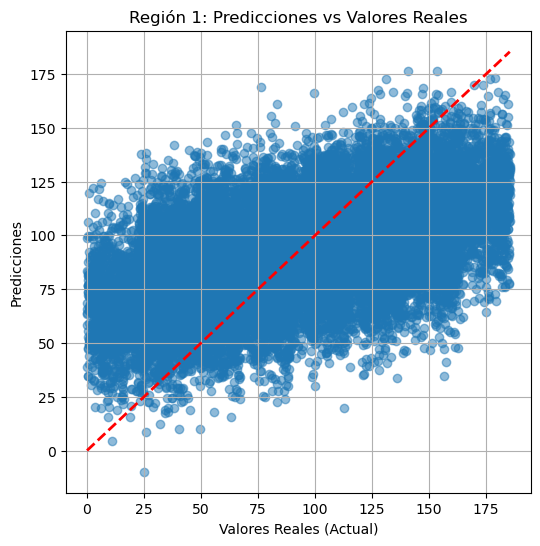

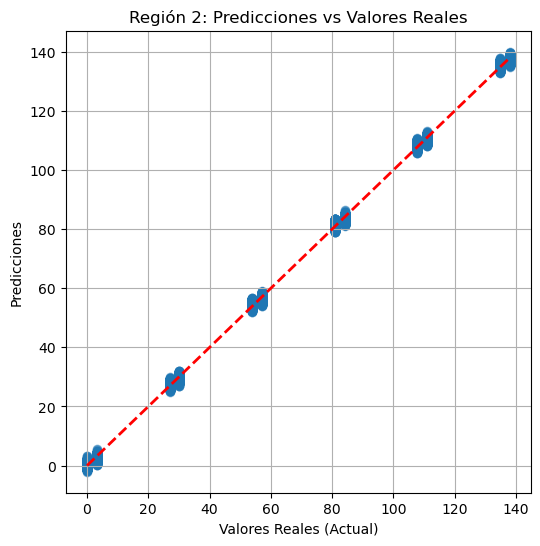

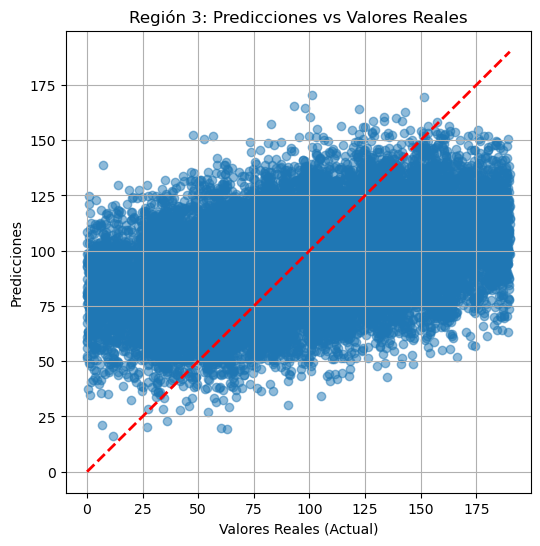

In [68]:
# Función para crear un gráfico de dispersión
def plot_predictions_vs_actual(predictions, actual, region):
    plt.figure(figsize=(6, 6))
    plt.scatter(actual, predictions, alpha=0.5)
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', lw=2)
    plt.xlabel('Valores Reales (Actual)')
    plt.ylabel('Predicciones')
    plt.title(f'Región {region}: Predicciones vs Valores Reales')
    plt.grid(True)
    plt.show()

# Crear gráficos para cada región
plot_predictions_vs_actual(predictions_1, y_valid_1, 1)
plot_predictions_vs_actual(predictions_2, y_valid_2, 2)
plot_predictions_vs_actual(predictions_3, y_valid_3, 3)

<span style='color:#FF8C00; font-weight:bold;'>Explicación: </span>

Región 1:
Los puntos están bastante dispersos alrededor de la línea ideal (roja).
Esto sugiere que el modelo tiene errores en las predicciones, con una dispersión significativa, lo cual es coherente con el RMSE más alto que obtuvimos.

Región 2:
Los puntos siguen casi perfectamente la línea ideal, lo que indica que las predicciones del modelo son muy precisas.
Este comportamiento refleja el RMSE muy bajo que observamos para esta región.

Región 3:
Al igual que en la Región 1, los puntos muestran una dispersión considerable alrededor de la línea ideal.
Esto es consistente con el RMSE elevado, lo que sugiere que el modelo tiene dificultades para predecir con precisión en esta región.

<span style='color:#FF8C00; font-weight:bold;'>Conclusión: </span>

Región 2 tiene el mejor rendimiento, con predicciones muy alineadas con los valores reales.
Las Regiones 1 y 3 presentan más dispersión, lo que indica un desempeño menos preciso del modelo en estas zonas.


<span style='color:#2ca02c; font-weight:bold;'>**3.Preparación para el cálculo de ganancias:**</span>

<span style='color:#1E90FF;'> Almacenamiento de valores:</span>

In [80]:
# Almacenar los volúmenes medios predichos
mean_volume_1 = predictions_1.mean()
mean_volume_2 = predictions_2.mean()
mean_volume_3 = predictions_3.mean()

# Almacenar los RMSE de cada región
rmse_1 = np.sqrt(mean_squared_error(y_valid_1, predictions_1))
rmse_2 = np.sqrt(mean_squared_error(y_valid_2, predictions_2))
rmse_3 = np.sqrt(mean_squared_error(y_valid_3, predictions_3))

# Almacenar los DataFrames con predicciones y valores reales
result_1 = pd.DataFrame({'Predictions': predictions_1, 'Actual': y_valid_1.reset_index(drop=True)})
result_2 = pd.DataFrame({'Predictions': predictions_2, 'Actual': y_valid_2.reset_index(drop=True)})
result_3 = pd.DataFrame({'Predictions': predictions_3, 'Actual': y_valid_3.reset_index(drop=True)})

# Imprimir las variables para confirmar que se almacenaron correctamente
print(f"Volumen medio Región 1: {mean_volume_1:.2f}, RMSE: {rmse_1:.2f}")
print(f"Volumen medio Región 2: {mean_volume_2:.2f}, RMSE: {rmse_2:.2f}")
print(f"Volumen medio Región 3: {mean_volume_3:.2f}, RMSE: {rmse_3:.2f}")

Volumen medio Región 1: 92.40, RMSE: 37.76
Volumen medio Región 2: 68.71, RMSE: 0.89
Volumen medio Región 3: 94.77, RMSE: 40.15


<span style='color:#FF8C00; font-weight:bold;'>Explicación: </span>
Guardamos el volumen medio predicho para cada región con .mean(). Calculamos y almacenamos el RMSE de cada región usando mean_squared_error. Almacenamos las predicciones y valores reales en DataFrames para cada región. Imprimimos las variables para asegurarnos de que todo se guardó correctamente.

<span style='color:#1E90FF;'> Comparación de reservas medias por región con el umbral de rentabilidad:</span>

In [89]:
# Almacenamos el valor necesario por pozo en unidades
min_required_units = 111.1

# Comparación entre el volumen medio predicho y el mínimo requerido
print(f"Volumen medio predicho Región 1: {mean_volume_1:.2f} unidades")
print(f"Volumen medio predicho Región 2: {mean_volume_2:.2f} unidades")
print(f"Volumen medio predicho Región 3: {mean_volume_3:.2f} unidades")
print(f"Unidades mínimas necesarias para evitar pérdidas: {min_required_units:.2f} unidades")

# Evaluar si cada región cumple con el mínimo necesario
print("\nComparación con el valor mínimo necesario:")
print(f"Región 1: {'Cumple' if mean_volume_1 >= min_required_units else 'No cumple'}")
print(f"Región 2: {'Cumple' if mean_volume_2 >= min_required_units else 'No cumple'}")
print(f"Región 3: {'Cumple' if mean_volume_3 >= min_required_units else 'No cumple'}")

Volumen medio predicho Región 1: 92.40 unidades
Volumen medio predicho Región 2: 68.71 unidades
Volumen medio predicho Región 3: 94.77 unidades
Unidades mínimas necesarias para evitar pérdidas: 111.10 unidades

Comparación con el valor mínimo necesario:
Región 1: No cumple
Región 2: No cumple
Región 3: No cumple


<span style='color:#FF8C00; font-weight:bold;'>Explicación: </span>
Guardamos en la variable min_required_units el valor de 111.1 unidades para cada pozo, lo que asegura que la inversión no tenga pérdidas.
Mostramos los volúmenes medios predichos para cada región.
Usamos una estructura condicional para verificar si cada región cumple con el mínimo necesario de 111.1 unidades por pozo.

Si los volúmenes medios predichos no alcanzan las 111.1 unidades, esa región podría no ser rentable. En este caso, ninguna región cumple, lo que sugiere que necesitaríamos explorar más o encontrar mejores pozos.

<span style='color:#1E90FF;'> Conclusiones y preparación para el cálculo del beneficio:</span>

<span style='color:#FF69B4;'> Identificación de la región más prometedora:</span>
Aunque ninguna región cumple con el volumen mínimo de 111.1 unidades por pozo, Región 2 tiene el menor RMSE (0.89). Esto indica que las predicciones para esta región son más precisas y podemos confiar más en los valores predichos.
Esta precisión puede ser clave para seleccionar los mejores pozos de esta región, minimizando el riesgo de pérdidas.

<span style='color:#FF69B4;'> Optimización de la selección de pozos:</span>
En lugar de usar el promedio de todas las reservas, enfocaremos el cálculo del beneficio en seleccionar los 200 pozos con las mayores reservas predichas en cada región.
Esto aumentará las probabilidades de alcanzar un beneficio positivo.

<span style='color:#FF69B4;'> Reparación de los datos para calcular el beneficio:</span>
Ordenaremos las predicciones de cada región en orden descendente para seleccionar los 200 mejores pozos.
Calcularemos el beneficio total multiplicando las unidades seleccionadas por 4,500 USD por unidad.
Compararemos estos beneficios entre las tres regiones para elegir la mejor opción.

<span style='color:#FF69B4;'> Cálculo del riesgo:</span>
Implementaremos una técnica de bootstrapping para evaluar el riesgo de pérdidas en cada región y verificar si se mantiene por debajo del 2.5% permitido.

<span style='color:#2ca02c; font-weight:bold;'>**4.Función para calcular ganancias y modelar predicciones:**</span>

<span style='color:#1E90FF;'> Selección de los 200 pozos con mejores predicciones por región:</span>

In [105]:
# Lista de resultados y nombres de archivos para cada región
results = [result_1, result_2, result_3]
file_names = ['top_200_region_1.csv', 'top_200_region_2.csv', 'top_200_region_3.csv']

# Seleccionar los 200 mejores pozos para cada región y guardarlos en CSV
for i, (result, file_name) in enumerate(zip(results, file_names), start=1):
    top_200 = result.nlargest(200, 'Predictions')
    top_200.to_csv(file_name, index=False)
    print(f"Top 200 Pozos - Región {i}:\n", top_200.head(), "\n")

Top 200 Pozos - Región 1:
        Predictions      Actual
6958    176.536104  153.639837
18194   176.274510  140.631646
17251   173.249504  178.879516
457     172.802708  176.807828
2202    172.744977  130.985681 

Top 200 Pozos - Región 2:
        Predictions      Actual
20776   139.983277  137.945408
2323    139.700803  137.945408
13895   139.616544  137.945408
6950    139.514768  137.945408
9151    139.472212  137.945408 

Top 200 Pozos - Región 3:
        Predictions      Actual
21852   170.529209  101.225039
10722   169.673332  151.655778
6209    165.300724   92.947333
8203    164.613896   97.775979
8042    163.964000  122.460897 



<span style='color:#FF8C00; font-weight:bold;'>Explicación: </span>
Utilizamos un bucle for para iterar a través de los resultados de las tres regiones, evitando repetir el mismo código. Guardamos los nombres de los archivos CSV en una lista (file_names) para que el bucle los use al guardar cada resultado. Usamos .nlargest() para seleccionar las 200 filas con las predicciones más altas y guardamos el resultado en un archivo CSV correspondiente.

<span style='color:#1E90FF;'> Resumen y guardado de predicciones por región:</span>

In [109]:
# Almacenar los DataFrames de los 200 mejores pozos y nombres descriptivos
top_200_results = [top_200_1, top_200_2, top_200_3]
region_names = ['Región 1', 'Región 2', 'Región 3']

# Variables para almacenar volúmenes totales y predicciones de los 200 mejores pozos
total_volumes = []
top_200_predictions = []

# Bucle para calcular y almacenar los volúmenes totales y predicciones
for i, top_200 in enumerate(top_200_results):
    total_volume = top_200['Predictions'].sum()
    total_volumes.append(total_volume)
    top_200_predictions.append(top_200['Predictions'].values)
    
    # Mostrar el volumen total para la región actual
    print(f"{region_names[i]} - Volumen total predicho: {total_volume:.2f} unidades")

Región 1 - Volumen total predicho: 30881.46 unidades
Región 2 - Volumen total predicho: 27748.75 unidades
Región 3 - Volumen total predicho: 29728.85 unidades


<span style='color:#FF8C00; font-weight:bold;'>Explicación: </span>
Usamos un bucle for para recorrer los DataFrames de los 200 mejores pozos en cada región, evitando repetir el código. Esta fue la lista donde guardamos los volúmenes totales de las tres regiones: total_volumes.
Esta fue la lista donde guardamos las predicciones de los 200 mejores pozos en cada región: top_200_predictions. Imprimimos el volumen total predicho para cada región dentro del bucle.

<span style='color:#1E90FF;'> Cálculo de ganancias y propuesta de región:</span>

In [118]:
# Definir el valor por unidad
revenue_per_unit = 4500

# Calcular la ganancia potencial para cada región
potential_gains = [volume * revenue_per_unit for volume in total_volumes]

# Mostrar los resultados
for i, gain in enumerate(potential_gains, start=1):
    print(f"Ganancia potencial - Región {i}: ${gain:,.2f}")

Ganancia potencial - Región 1: $138,966,584.80
Ganancia potencial - Región 2: $124,869,381.15
Ganancia potencial - Región 3: $133,779,815.14


<span style='color:#FF8C00; font-weight:bold;'>Explicación: </span>
Multiplicamos cada volumen total por 4,500 USD (valor por unidad) para obtener la ganancia potencial para cada región.
Guardamos las ganancias en una lista (potential_gains) y las mostramos con formato de moneda.

<span style='color:#2ca02c; font-weight:bold;'>**5.Riesgos y ganancias por región:**</span>

<span style='color:#1E90FF;'> Bootstrapping para la distribución de beneficios:</span>

In [128]:
# Definir parámetros
revenue_per_unit = 4500  # Valor por unidad en USD
num_samples = 1000       # Número de muestras para bootstrapping
pozos_seleccionados = 200  # Número de pozos seleccionados

# Función para realizar bootstrapping y calcular beneficios
def bootstrap_profit(predictions):
    profits = []
    for _ in range(num_samples):
        sample = np.random.choice(predictions, size=pozos_seleccionados, replace=True)
        profit = sample.sum() * revenue_per_unit
        profits.append(profit)
    return profits

# Aplicar bootstrapping utilizando las predicciones de los 200 mejores pozos
bootstrap_profits_1 = bootstrap_profit(top_200_predictions[0])
bootstrap_profits_2 = bootstrap_profit(top_200_predictions[1])
bootstrap_profits_3 = bootstrap_profit(top_200_predictions[2])

# Mostrar las primeras 5 ganancias para verificar
print(f"Primeras 5 ganancias Región 1: {bootstrap_profits_1[:5]}")
print(f"Primeras 5 ganancias Región 2: {bootstrap_profits_2[:5]}")
print(f"Primeras 5 ganancias Región 3: {bootstrap_profits_3[:5]}")

Primeras 5 ganancias Región 1: [138963993.0362309, 139193375.3440458, 139294554.44742373, 138912533.52877098, 138915304.62475392]
Primeras 5 ganancias Región 2: [124888632.79115002, 124870921.2596799, 124873126.24869566, 124891074.18566453, 124894578.80097623]
Primeras 5 ganancias Región 3: [134186267.9448085, 133085162.43316992, 133865477.95228, 133621134.48088598, 133509222.69705337]


<span style='color:#FF8C00; font-weight:bold;'>Explicación: </span>
La función bootstrap_profit toma 1,000 muestras aleatorias de 200 pozos, calcula el beneficio multiplicando por 4,500 USD, y muestra las primeras 5 ganancias para verificar.

<span style='color:#1E90FF;'> Beneficio promedio, confianza y riesgo de pérdidas:</span>

In [134]:
# Función para calcular el beneficio promedio, intervalo de confianza y riesgo de pérdidas
def analyze_profits(bootstrap_profits):
    # Beneficio promedio
    mean_profit = np.mean(bootstrap_profits)
    
    # Intervalo de confianza del 95%
    confidence_interval = np.percentile(bootstrap_profits, [2.5, 97.5])
    
    # Riesgo de pérdidas (porcentaje de ganancias negativas)
    risk_of_loss = np.mean(np.array(bootstrap_profits) < 0) * 100

    return mean_profit, confidence_interval, risk_of_loss

# Aplicar la función a cada región
for i, profits in enumerate([bootstrap_profits_1, bootstrap_profits_2, bootstrap_profits_3], start=1):
    mean_profit, conf_interval, risk = analyze_profits(profits)
    print(f"Región {i}:")
    print(f"  Beneficio promedio: ${mean_profit:,.2f}")
    print(f"  Intervalo de confianza del 95%: ${conf_interval[0]:,.2f} - ${conf_interval[1]:,.2f}")
    print(f"  Riesgo de pérdidas: {risk:.2f}%\n")

Región 1:
  Beneficio promedio: $138,969,418.64
  Intervalo de confianza del 95%: $138,175,202.20 - $139,766,257.56
  Riesgo de pérdidas: 0.00%

Región 2:
  Beneficio promedio: $124,869,967.84
  Intervalo de confianza del 95%: $124,837,645.75 - $124,903,920.12
  Riesgo de pérdidas: 0.00%

Región 3:
  Beneficio promedio: $133,786,508.45
  Intervalo de confianza del 95%: $133,196,810.91 - $134,424,060.81
  Riesgo de pérdidas: 0.00%



<span style='color:#FF8C00; font-weight:bold;'>Explicación: </span>
Calculamos la media de los beneficios obtenidos en las 1,000 muestras. Utilizamos np.percentile() para obtener los percentiles 2.5 y 97.5. Calculamos la proporción de muestras con beneficio negativo y la expresamos como un porcentaje. Usamos un bucle para aplicar la función a cada región y mostrar los resultados.

<span style='color:#1E90FF;'> Conclusiones y propuesta final de región:</span>

Con base en el análisis realizado:

<span style='color:#7B68EE;'> **Beneficio Promedio:** </span>

    -Región 1: $138,969,418.64

    -Región 2: $124,869,967.84

    -Región 3: $133,786,508.45

<span style='color:#7B68EE;'> **Riesgo de Pérdidas:** </span>
Las tres regiones tienen un riesgo de pérdidas del 0%, lo que indica que no hay riesgo de obtener ganancias negativas en ninguna región.

<span style='color:#7B68EE;'> **Intervalo de Confianza (95%):** </span>
Región 1 tiene un intervalo de confianza más elevado y un beneficio promedio mayor en comparación con las otras regiones.

<span style='color:#7B68EE;'> **Propuesta:** </span>

Se recomienda desarrollar los pozos en la Región 1. 

Esta región tiene: El beneficio promedio más alto. Un intervalo de confianza sólido y estrecho, lo que indica estabilidad en las predicciones.
0% de riesgo de pérdidas, al igual que las otras regiones.

<span style='color:#7B68EE;'> **¿Coincide con la elección anterior (Punto 4.3)?:** </span>

Sí, la Región 1 ya había sido recomendada en el punto 4.3 debido a su mayor volumen total de reservas predichas. Esto confirma que tanto el análisis de volúmenes como el análisis de beneficio respaldan la elección de la Región 1 para la inversión.

<span style='color:#2ca02c; font-weight:bold;'>**6.Conclusión:**</span>

La Región 1 es la opción más rentable para el desarrollo de pozos petrolíferos, gracias a su alto beneficio esperado y bajo riesgo. Este proyecto proporciona una base sólida para la toma de decisiones estratégicas, combinando un análisis cuantitativo riguroso con modelos predictivos efectivos.